# Linear Regression

#### Import required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cntk
from cntk import Trainer, learning_rate_schedule, UnitType
from cntk.learners import sgd
from cntk.layers import default_options, Dense
import argparse

#### Define the parameters

In [2]:
num_samples = 500
initial_learning_rate = 0.001
num_epochs = 300
num_samples_to_train = 400
batch_size = 25

# Network has only one output which is its prediction.
input_dim = 1
num_outputs = 1
num_minibatches_to_train = int(num_samples_to_train / batch_size)

### Arbitrary data creation

In [3]:
# random data
features = np.linspace(-1, 1, num_samples)
predictions = 2 * features + np.random.randn(*features.shape) * 0.5

### Scatter plot

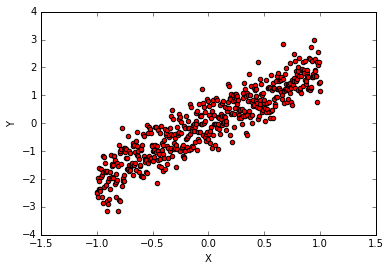

In [4]:
plt.scatter(features, predictions, c='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### Adding one dimension for further processing. Input must be formatted as (batch_size,1).

In [5]:
features = features[:,None]
predictions = predictions[:,None]


### Network Architecture

#### Output is a single node with a linear operation.

In [6]:
input = cntk.input_variable(input_dim)
label = cntk.input_variable(num_outputs)
pred = Dense(num_outputs)(input)

#### Defining loss

In [7]:
loss = cntk.squared_error(pred, label)
eval_fun = cntk.squared_error(pred, label)

## Training

#### Instantiate the trainer object to drive the model training

In [8]:
learning_rate = learning_rate_schedule(initial_learning_rate, UnitType.minibatch)
optimizer_op = sgd(pred.parameters, learning_rate)
train_op = Trainer(pred, (loss, eval_fun), [optimizer_op])

#### Training loop

In [9]:
for epoch in range(0, num_epochs):
    for batch_num in range(0, num_minibatches_to_train):
        batch_features = features[(batch_num * batch_size):(batch_num * batch_size + batch_size), :].astype(np.float32)
        batch_labels = predictions[(batch_num * batch_size):(batch_num * batch_size + batch_size), :]
        train_op.train_minibatch({input: batch_features, label: batch_labels})
        training_loss = train_op.previous_minibatch_loss_average
        eval_value = train_op.previous_minibatch_evaluation_average
    print("Epoch: {0}, Loss: {1:.2f}".format(epoch+1, training_loss))

/home/sina/anaconda/envs/cntk-py35/lib/python3.5/site-packages/cntk/core.py:351: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


Epoch: 1, Loss: 2.64
Epoch: 2, Loss: 2.65
Epoch: 3, Loss: 2.67
Epoch: 4, Loss: 2.68
Epoch: 5, Loss: 2.69
Epoch: 6, Loss: 2.70
Epoch: 7, Loss: 2.71
Epoch: 8, Loss: 2.72
Epoch: 9, Loss: 2.72
Epoch: 10, Loss: 2.73
Epoch: 11, Loss: 2.73
Epoch: 12, Loss: 2.73
Epoch: 13, Loss: 2.73
Epoch: 14, Loss: 2.73
Epoch: 15, Loss: 2.72
Epoch: 16, Loss: 2.72
Epoch: 17, Loss: 2.72
Epoch: 18, Loss: 2.71
Epoch: 19, Loss: 2.70
Epoch: 20, Loss: 2.70
Epoch: 21, Loss: 2.69
Epoch: 22, Loss: 2.68
Epoch: 23, Loss: 2.67
Epoch: 24, Loss: 2.66
Epoch: 25, Loss: 2.64
Epoch: 26, Loss: 2.63
Epoch: 27, Loss: 2.62
Epoch: 28, Loss: 2.60
Epoch: 29, Loss: 2.59
Epoch: 30, Loss: 2.57
Epoch: 31, Loss: 2.56
Epoch: 32, Loss: 2.54
Epoch: 33, Loss: 2.52
Epoch: 34, Loss: 2.51
Epoch: 35, Loss: 2.49
Epoch: 36, Loss: 2.47
Epoch: 37, Loss: 2.45
Epoch: 38, Loss: 2.43
Epoch: 39, Loss: 2.42
Epoch: 40, Loss: 2.40
Epoch: 41, Loss: 2.38
Epoch: 42, Loss: 2.36
Epoch: 43, Loss: 2.34
Epoch: 44, Loss: 2.32
Epoch: 45, Loss: 2.30
Epoch: 46, Loss: 2.

## Model Evaluation

#### Test data

In [10]:
test_features = features[num_samples_to_train:num_samples, :]
test_labels = predictions[num_samples_to_train:num_samples, :]

#### Train data

In [11]:
train_features = features[0:num_samples_to_train, :]
train_labels = predictions[0:num_samples_to_train, :]

#### Print weight and bias

In [12]:
print("Trained parameters are: w= {0:.2f}, b={1:.2f}".format(pred.W.value[0][0], pred.b.value[0]))

Trained parameters are: w= 1.57, b=-0.12


## Plot

#### Evaluation of training set

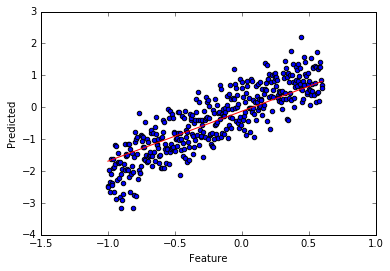

In [13]:
plt.scatter(train_features[:,0], train_labels[:,0], c='b')
X = train_features[:,0]
Y = pred.W.value[0] * train_features[:,0] + pred.b.value[0]
plt.plot(X, Y, 'r')
plt.xlabel("Feature")
plt.ylabel("Predicted")
plt.show()

#### Evaluation on test set

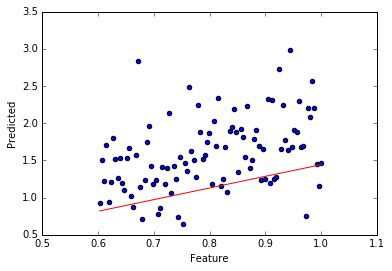

In [14]:
plt.scatter(test_features[:,0], test_labels[:,0], c='b')
X = test_features[:,0]
Y = pred.W.value[0] * test_features[:,0] + pred.b.value[0]
plt.plot(X, Y, 'r')
plt.xlabel("Feature")
plt.ylabel("Predicted")
plt.show()